In [1]:
import yfinance as yf
import pandas as pd

In [2]:
gold = 'gld'

In [28]:
historical_data = yf.download(gold, start="2004-11-18", end="2023-11-10") # initial 2000-01-01, but started from 2004-11-18

[*********************100%%**********************]  1 of 1 completed


In [29]:
historical_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-11-18,44.430000,44.490002,44.070000,44.380001,44.380001,5992000
2004-11-19,44.490002,44.919998,44.470001,44.779999,44.779999,11655300
2004-11-22,44.750000,44.970001,44.740002,44.950001,44.950001,11996000
2004-11-23,44.880001,44.919998,44.720001,44.750000,44.750000,3169200
2004-11-24,44.930000,45.049999,44.790001,45.049999,45.049999,6105100


In [33]:
gold = pd.DataFrame({
    'prices': historical_data['Close']
})

gold

,prices
Date,
2004-11-18,44.380001
2004-11-19,44.779999
2004-11-22,44.950001
2004-11-23,44.750000
2004-11-24,45.049999
...,...
2023-11-03,184.789993
2023-11-06,183.350006
2023-11-07,182.589996


In [14]:
historical_data = historical_data['Close']


In [15]:
historical_data

Date
2004-11-18     44.380001
2004-11-19     44.779999
2004-11-22     44.950001
2004-11-23     44.750000
2004-11-24     45.049999
                 ...    
2023-11-03    184.789993
2023-11-06    183.350006
2023-11-07    182.589996
2023-11-08    180.770004
2023-11-09    181.490005
Name: Close, Length: 4777, dtype: float64

<Axes: xlabel='Date'>

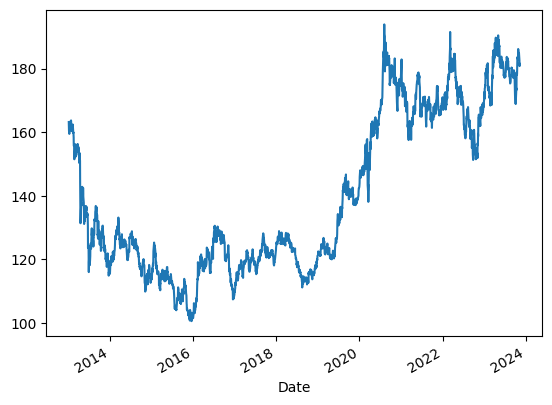

In [7]:
historical_data.plot()

In [16]:
import numpy as np
historical_data = historical_data.interpolate()
historical_data.apply(pd.isnull).sum()

0

In [17]:
def df_to_X_y(df, window_size):
    df_as_np = df.to_numpy()

    X = []
    y = []

    for i in range(len(df_as_np) - window_size ):
        row = [[a] for a in df_as_np[i:i+window_size]]

        X.append(row)
        label = df_as_np[i+window_size]
        y.append(label)

    return np.array(X), np.array(y)

In [18]:
WINDOW_SIZE = 50

X, y = df_to_X_y(historical_data, WINDOW_SIZE)

X.shape, y.shape

((4727, 50, 1), (4727,))

In [19]:



trn_upper = int(len(historical_data) * 0.8)
valid_upper = int(len(historical_data) * 0.9)
upper = len(historical_data)

print(trn_upper,valid_upper,upper)

3821 4299 4777


In [20]:
X_train, y_train = X[:trn_upper], y[:trn_upper]
X_val, y_val = X[trn_upper:valid_upper], y[trn_upper:valid_upper]
X_test, y_test = X[valid_upper:], y[valid_upper:]

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((3821, 50, 1), (3821,), (478, 50, 1), (478,), (428, 50, 1), (428,))

In [63]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import * #Dense, Dropout, Activation, Flatten
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [29]:
gold20 = Sequential()
gold20.add(InputLayer((WINDOW_SIZE,1)))
gold20.add(LSTM(64,return_sequences=True))
gold20.add(LSTM(64,return_sequences=True))
gold20.add(LSTM(32,return_sequences=True))
gold20.add(LSTM(8))
gold20.add(Dense(8,'relu'))
gold20.add(Dense(1,'linear'))
gold20.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_7 (LSTM)               (None, 100, 64)           16896     
                                                                 
 lstm_8 (LSTM)               (None, 100, 64)           33024     
                                                                 
 lstm_9 (LSTM)               (None, 100, 32)           12416     
                                                                 
 lstm_10 (LSTM)              (None, 8)                 1312      
                                                                 
 dense_6 (Dense)             (None, 8)                 72        
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 63,729
Trainable params: 63,729
Non-trai

In [30]:
cp = ModelCheckpoint('gold20/', save_best_only=True)
gold20.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [31]:
gold20.fit(X_train, y_train, validation_data=(X_val,y_val), epochs=90, callbacks=[cp])

Epoch 1/90
69/69 [==============================] - ETA: 0s - loss: 17938.0840 - root_mean_squared_error: 133.9331

INFO:tensorflow:Assets written to: gold20\assets


INFO:tensorflow:Assets written to: gold20\assets


69/69 [==============================] - 17s 188ms/step - loss: 17938.0840 - root_mean_squared_error: 133.9331 - val_loss: 28480.5234 - val_root_mean_squared_error: 168.7617
Epoch 2/90
69/69 [==============================] - ETA: 0s - loss: 17841.7969 - root_mean_squared_error: 133.5732

INFO:tensorflow:Assets written to: gold20\assets


INFO:tensorflow:Assets written to: gold20\assets


69/69 [==============================] - 12s 179ms/step - loss: 17841.7969 - root_mean_squared_error: 133.5732 - val_loss: 28337.5254 - val_root_mean_squared_error: 168.3375
Epoch 3/90
68/69 [============================>.] - ETA: 0s - loss: 17738.3516 - root_mean_squared_error: 133.1854

INFO:tensorflow:Assets written to: gold20\assets


INFO:tensorflow:Assets written to: gold20\assets


69/69 [==============================] - 14s 208ms/step - loss: 17751.2441 - root_mean_squared_error: 133.2338 - val_loss: 28244.7910 - val_root_mean_squared_error: 168.0619
Epoch 4/90
68/69 [============================>.] - ETA: 0s - loss: 17706.7207 - root_mean_squared_error: 133.0666

INFO:tensorflow:Assets written to: gold20\assets


INFO:tensorflow:Assets written to: gold20\assets


69/69 [==============================] - 14s 211ms/step - loss: 17684.2656 - root_mean_squared_error: 132.9822 - val_loss: 28167.2793 - val_root_mean_squared_error: 167.8311
Epoch 5/90
68/69 [============================>.] - ETA: 0s - loss: 17631.0273 - root_mean_squared_error: 132.7819

INFO:tensorflow:Assets written to: gold20\assets


INFO:tensorflow:Assets written to: gold20\assets


69/69 [==============================] - 18s 263ms/step - loss: 17630.2988 - root_mean_squared_error: 132.7791 - val_loss: 28105.8301 - val_root_mean_squared_error: 167.6479
Epoch 6/90
68/69 [============================>.] - ETA: 0s - loss: 17582.6230 - root_mean_squared_error: 132.5995

INFO:tensorflow:Assets written to: gold20\assets


INFO:tensorflow:Assets written to: gold20\assets


69/69 [==============================] - 14s 208ms/step - loss: 17586.7227 - root_mean_squared_error: 132.6149 - val_loss: 28054.6367 - val_root_mean_squared_error: 167.4952
Epoch 7/90
69/69 [==============================] - ETA: 0s - loss: 17549.4473 - root_mean_squared_error: 132.4743

INFO:tensorflow:Assets written to: gold20\assets


INFO:tensorflow:Assets written to: gold20\assets


69/69 [==============================] - 15s 215ms/step - loss: 17549.4473 - root_mean_squared_error: 132.4743 - val_loss: 28009.7383 - val_root_mean_squared_error: 167.3611
Epoch 8/90
69/69 [==============================] - ETA: 0s - loss: 17515.6816 - root_mean_squared_error: 132.3468

INFO:tensorflow:Assets written to: gold20\assets


INFO:tensorflow:Assets written to: gold20\assets


69/69 [==============================] - 15s 225ms/step - loss: 17515.6816 - root_mean_squared_error: 132.3468 - val_loss: 27967.8770 - val_root_mean_squared_error: 167.2360
Epoch 9/90
68/69 [============================>.] - ETA: 0s - loss: 17490.1035 - root_mean_squared_error: 132.2502

INFO:tensorflow:Assets written to: gold20\assets


INFO:tensorflow:Assets written to: gold20\assets


69/69 [==============================] - 15s 219ms/step - loss: 17483.5918 - root_mean_squared_error: 132.2255 - val_loss: 27927.4766 - val_root_mean_squared_error: 167.1152
Epoch 10/90
69/69 [==============================] - ETA: 0s - loss: 17452.2578 - root_mean_squared_error: 132.1070

INFO:tensorflow:Assets written to: gold20\assets


INFO:tensorflow:Assets written to: gold20\assets


69/69 [==============================] - 13s 187ms/step - loss: 17452.2578 - root_mean_squared_error: 132.1070 - val_loss: 27887.6289 - val_root_mean_squared_error: 166.9959
Epoch 11/90
36/69 [==============>...............] - ETA: 1s - loss: 17443.3301 - root_mean_squared_error: 132.0732

KeyboardInterrupt: 

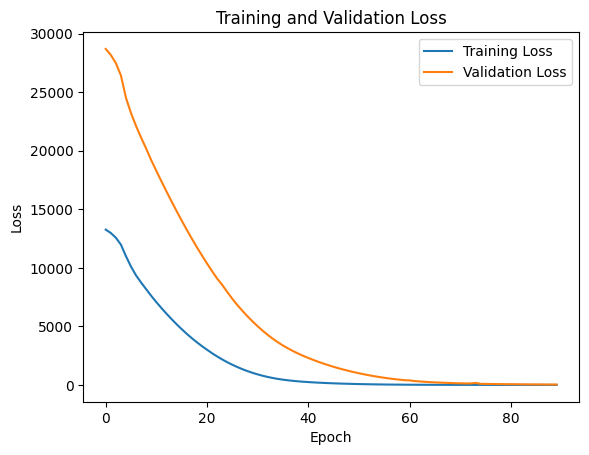

In [ ]:
history = gold20.history
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
train_predictions = gold20.predict(X_train).flatten()
print(len(train_predictions))
print(len(y_train))

120/120 [==============================] - 1s 6ms/step
3821
3821


In [ ]:
len(X_train.flatten()), len(y_train)

(191050, 3821)

In [ ]:
train_predictions.shape, y_train.shape

((3821,), (3821,))

In [ ]:
# train_predictions = gold20.predict(X_train).flatten()
train_results = pd.DataFrame(data={'Train predictions': train_predictions, 'actual':y_train})
train_results

,Train predictions,actual
0,42.524048,42.099998
1,42.331478,42.160000
2,42.390114,41.680000
3,42.060596,41.470001
4,41.799938,41.270000
...,...,...
3816,151.339142,148.050003
3817,148.754532,149.449997
3818,149.277481,151.899994
3819,150.598770,152.649994


In [1]:
import matplotlib.pyplot as plt

plt.plot(train_results['Train predictions'][100:200])
plt.plot(train_results['actual'][100:200])


KeyboardInterrupt



In [ ]:
val_predictions = gold20.predict(X_val).flatten()
val_results = pd.DataFrame(data={'Val predictions': val_predictions, 'actual':y_val})
val_results

15/15 [==============================] - 0s 5ms/step


,Val predictions,actual
0,153.644196,156.039993
1,153.929596,154.649994
2,153.725525,158.690002
3,155.785385,161.410004
4,157.453171,162.679993
...,...,...
473,169.022644,177.490005
474,169.152328,178.289993
475,169.288208,177.139999
476,169.290894,176.550003


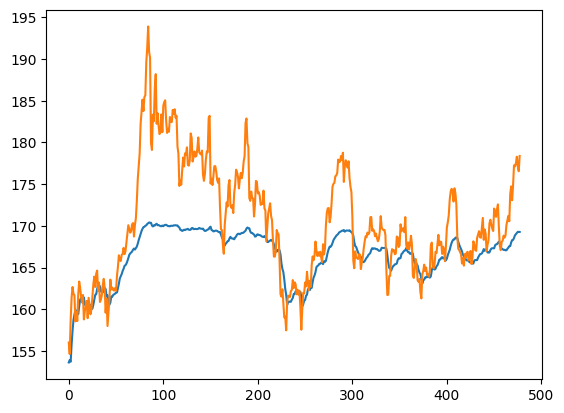

In [ ]:
plt.plot(val_results['Val predictions'])
plt.plot(val_results['actual'])

In [ ]:
test_predictions = gold20.predict(X_test).flatten()
test_results = pd.DataFrame(data={'Test predictions': test_predictions, 'actual':y_test})
test_results

14/14 [==============================] - 0s 6ms/step


,Test predictions,actual
0,169.412567,181.619995
1,169.643341,179.729996
2,169.635254,180.800003
3,169.717178,183.679993
4,169.886185,186.410004
...,...,...
423,170.099243,184.789993
424,170.129181,183.350006
425,170.085464,182.589996
426,170.049194,180.770004


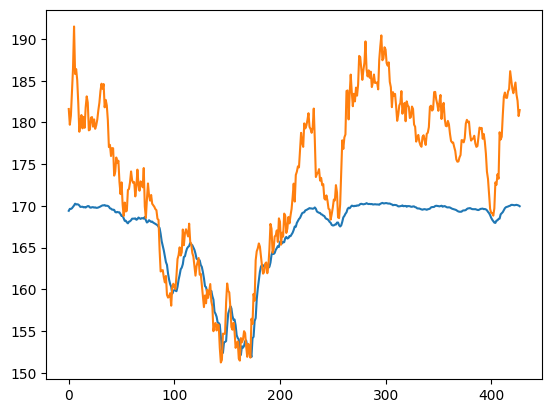

In [ ]:
plt.plot(test_results['Test predictions'])
plt.plot(test_results['actual'])

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
predictions = test_results['Test predictions']
actual = test_results['actual']

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(actual, predictions)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(actual, predictions)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 7.066864120626004
Mean Squared Error (MSE): 76.8877689977319
Root Mean Squared Error (RMSE): 8.76856710060041


# Normalising the values for the subsequent models, and checking the stationarity

<Axes: xlabel='Date'>

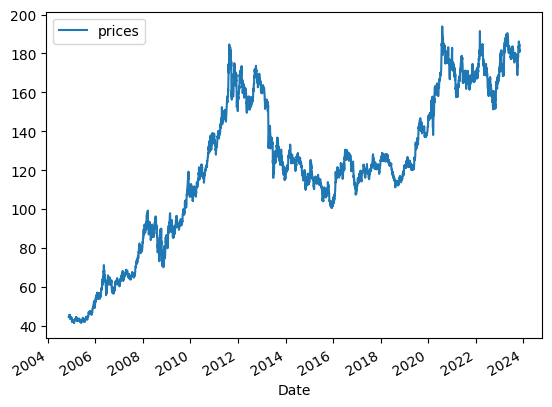

In [36]:
gold.plot()

In [39]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

In [34]:
gold.head()

,prices
Date,
2004-11-18,44.380001
2004-11-19,44.779999
2004-11-22,44.950001
2004-11-23,44.750000
2004-11-24,45.049999


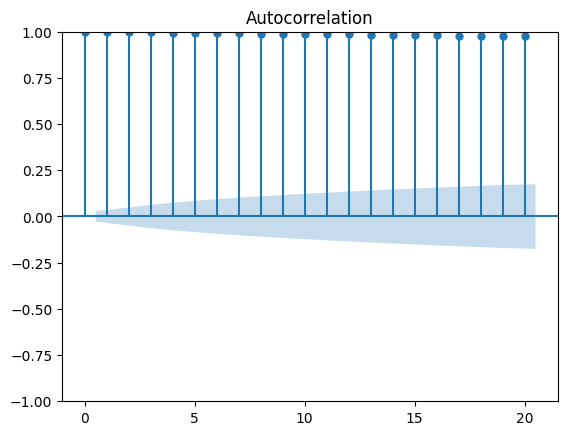

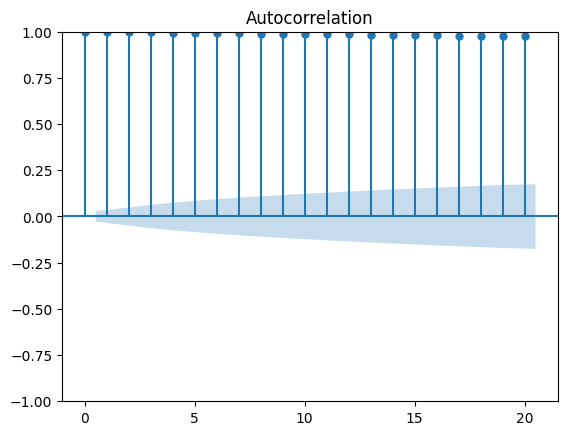

In [38]:
# auto co relation function

plot_acf(gold['prices'],lags=20)

In [51]:
# Augumented dicky fuler test

adftest = adfuller(gold['prices'], autolag='AIC', regression='ct')
adftest


(-2.1326516269070472,
 0.527770813200737,
 0,
 4776,
 {'1%': -3.960666787718315,
  '5%': -3.41140965953706,
  '10%': -3.1275915458120944},
 16317.939867368106)

In [53]:
from sklearn.preprocessing import  StandardScaler
scaler = StandardScaler()


In [56]:
X_train.shape, X_val.shape, X_test.shape

((3821, 50, 1), (478, 50, 1), (428, 50, 1))

In [57]:
num_samples, sequence_length, num_features = X_train.shape
X_train_reshaped = X_train.reshape((num_samples * sequence_length, num_features))

num_samples, sequence_length, num_features = X_val.shape
X_val_reshaped = X_val.reshape((num_samples * sequence_length, num_features))

num_samples, sequence_length, num_features = X_test.shape
X_test_reshaped = X_test.reshape((num_samples * sequence_length, num_features))

In [59]:
scaled_X_train = scaler.fit_transform(X_train_reshaped)
scaled_X_val = scaler.fit_transform(X_val_reshaped)
scaled_X_test = scaler.fit_transform(X_test_reshaped)

In [64]:
gold_scaled = Sequential()
gold_scaled.add(InputLayer((WINDOW_SIZE,1)))
gold_scaled.add(LSTM(64,return_sequences=True))
gold_scaled.add(LSTM(64,return_sequences=True))
gold_scaled.add(LSTM(32,return_sequences=True))
gold_scaled.add(LSTM(8))
gold_scaled.add(Dense(8,'relu'))
gold_scaled.add(Dense(1,'linear'))
gold_scaled.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 64)            16896     
                                                                 
 lstm_1 (LSTM)               (None, 50, 64)            33024     
                                                                 
 lstm_2 (LSTM)               (None, 50, 32)            12416     
                                                                 
 lstm_3 (LSTM)               (None, 8)                 1312      
                                                                 
 dense (Dense)               (None, 8)                 72        
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 63,729
Trainable params: 63,729
Non-traina

In [65]:
cp = ModelCheckpoint('gold_scaled/', save_best_only=True)
gold_scaled.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [66]:
gold_scaled.fit(scaled_X_train, y_train, validation_data=(scaled_X_val,y_val), epochs=90, callbacks=[cp])

ValueError: Data cardinality is ambiguous:
  x sizes: 191050
  y sizes: 3821
Make sure all arrays contain the same number of samples.